# Numerikk

Det fins mange problemer som enten 
- kan ikke løses analytisk
- krever vanvittig tid (CPU/minne)

## Tre søyler:
- numerisk lineær algebra 
- diff. ligninger
- optimering

## Løs ei likning:
$x^2=2$

Hva er et svar? Svaret er avhengig av en del faktorer

Er f.eks. $x=\sqrt 2$ et ålreit svar? Er f.eks. $x=1.41$ et ålreit svar?


## Hvis ikke nøyaktig, så? Noe som er grei nok

Modellproblem: vi skal løse ei likning $f(x)=0$

La oss betegne som $x_{exact}$ ei nøyaktig løsning og som $x_{computed}$ en tilgjengelig løsning

### To typer feil

- $$| x_{exact} - x_{computed}|$$ absolutt feil

- $$\dfrac{|x_{exact} - x_{computed}|}{|x_{exact}|}$$ relativ feil






## To metoder for å løse ei likning
Modellproblem: $y=f(x)=x^2+3x+2$. Vi skal løse $f(x)=0$. Vi kjenner til nøyaktige løsninger som er...

### Halveringsmetode
- Finn et intervall som inneholder ei løsning
- Gjør den smalere
- Gjenta til du er fornøyd

Vi ser på Geogebra først.

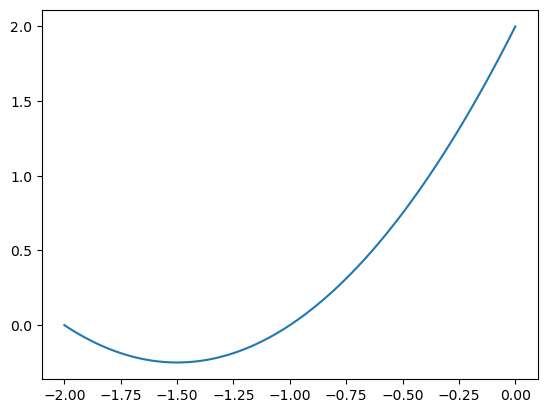

In [1]:
from pylab import plot,show
from numpy import array,linspace,sqrt,sin
from numpy.linalg import norm
import matplotlib.pyplot as pt

ff = lambda x : (pow(x,2)+3*x+2)

def pow3(my_list):
    return [ ff(x) for x in my_list ]


x = linspace(-2,0,100)
y = pow3(x)
plot(x,y)


0.0000000000 1.0000000000
-0.7500000000 0.2500000000
-1.1250000000 0.1250000000
-0.9375000000 0.0625000000
-1.0312500000 0.0312500000
-0.9843750000 0.0156250000
-1.0078125000 0.0078125000
-0.9960937500 0.0039062500
-1.0019531250 0.0019531250
-0.9990234375 0.0009765625
-1.0004882812 0.0004882812
-0.9997558594 0.0002441406
-1.0001220703 0.0001220703
-0.9999389648 0.0000610352
-1.0000305176 0.0000305176
-0.9999847412 0.0000152588
-1.0000076294 0.0000076294
-0.9999961853 0.0000038147
-1.0000019073 0.0000019073
-0.9999990463 0.0000009537
-1.0000004768 0.0000004768
-0.9999997616 0.0000002384
Funksjonen har et nullpunkt i x = -1.000.


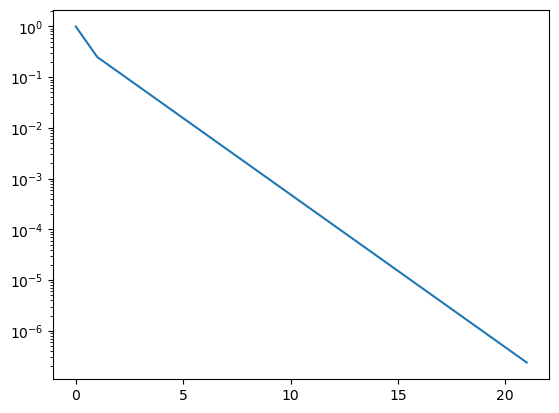

In [3]:
def f(x):
    return x**2 + 3*x +2

nedregrense = -1.50
øvregrense = 1.5

presisjon = 1e-6

a = nedregrense
b = øvregrense
m = (a + b)/2
x_exact = -1
x_err = []

while b - a > presisjon:
    abs_err = norm(x_exact-m)
    rel_err = abs_err/norm(x_exact)
    x_err.append(rel_err)
    print(f'{m:.10f}', f'{rel_err:.10f}')
    
    if f(a) * f(m) < 0:
        b = m
    elif f(b) * f(m) < 0:
        a = m
    elif f(m) == 0:
        break
    else:
        print(f"f({a}) og f({b}) er på samme side!")
        break
    m = (a + b)/2
 

print(f"Funksjonen har et nullpunkt i x = {m:.3f}.")

pt.semilogy(x_err)

## Fikspunktiterasjon

Vi ønsker å løse ei likning $x=f(x)$ (det samme som $x-f(x)=0$). Vi kan starte med en tilfeldig verdi $x_0$, plugge den inn i uttrykket og så få $x_1=f(x_0)$. Da kan vi gjenta trikset og rekne ut $x_2=f(x_1)$ og så videre. Hvis vi er heldige, så kommer $x_{n+1}$ ligge nærmere $x_n$ hvis $n$ er større og større. 

Hele metoden er derfor $$ x_{n+1} = f(x_n)$$ med et visst startverdi $x_0$.


Vi ser på $f(x) = x^2 + 3x+2 =0$. Vi må lage noe passende til fikspunktiterasjon, dvs isolere x på et vis.

$$ 3x = -2 - x^2 $$ 
eller
$$ x = \dfrac{-x^2-2}{3}. $$
Dette gir oss et formel som vi kan iterere

$$x_{n+1}= \frac{-x_n^2-2}{3} $$

In [28]:
 ## Naiv fikspunktiterasjon:
#toleranse = 0.01
def g(x):
    return (-x**2-2)/3
x = -2.1 
# x = 100 # Eksempel på ikke-konvergerende startpunkt
for i in range(10):
    x = g(x)
    print(x)
#print(x)

-2.1366666666666667
-2.188448148148148
-2.2631017657110197
-2.3738765339881116
-2.545096599539803
-2.8258389003296895
-3.328455163538836
-4.359537925229447
-7.001856973837959
-17.008667027361085


In [19]:
from pylab import plot,show
from numpy import array,linspace,sqrt,sin
from numpy.linalg import norm
import matplotlib.pyplot as pt

def fixedp(f,x0,tol=10e-5,maxiter=5):
 """ Fixed point algorithm """
 e = 1
 itr = 0
 xp = []
 while(e > tol and itr < maxiter):
  x = f(x0)      # fixed point equation
  e = norm(x0-x) # error at the current step
  x0 = x
  print(x0)
  xp.append(x0)  # save the solution of the current step
  itr = itr + 1
 return x,xp


-2.75
-3.1875
-4.053385416666667
-6.143311112015336
-13.24675713967037


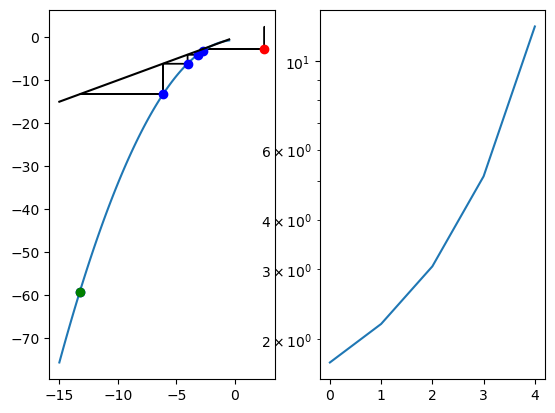

In [21]:
#f = lambda x : sqrt(x)
f = lambda x : (-pow(x,2)-2)/3

def power(my_list):
    return [ f(x) for x in my_list ]

#x_start = 1.2
x_start = 2.5

x_exact = -1

xf,xp = fixedp(f,x_start)

x_err = [abs(x - x_exact) for x in xp]

x = linspace(-15,-0.5,100)
y = f(x)

figure, axis = pt.subplots(1,2)
axis[0].plot(x,y,xp,power(xp),'bo',
     x_start,f(x_start),'ro',xf,f(xf),'go',x,x,'k')

xp.insert (0, x_start)
for index, elem in enumerate(xp):    
    if(index<(len(xp)-1)):
            thiselem = elem
            nextelem = xp[index+1]    
    axis[0].arrow(thiselem, thiselem, 0, nextelem-thiselem)
    axis[0].arrow(thiselem, nextelem, nextelem-thiselem, 0)

    
axis[1].semilogy(x_err)    
show()

## Hvorfor kan fikspunktiterasjon være trøblete?
Vi kan bruke linearisering for å finne ut av det.
Metoden tar utgangspunkt
$x_{n+1}=f(x_n)$. La oss anta at $x=\alpha$ er ei nøyaktig løsning, dvs $f(\alpha)=\alpha$. Funksjonen $f(x)$ i nærheten av  $x=\alpha$ er da tilnærmet lik 
$$
f(x) = f(\alpha) + f'(\alpha)(x-\alpha).
$$
Dette gir oss
$$
x_{n+1}=f(x_n)=f(\alpha) + f'(\alpha)(x_n-\alpha) = \alpha + f'(\alpha)(x_n-\alpha).
$$
Vi kan skrive om dette som
$$
x_{n+1}-\alpha = f'(\alpha)(x_n-\alpha).
$$
Dette viser oss hva som skjer med (absolutt) feil: $|x_{n+1}-\alpha|$ er feil på steg $n+1$, mens $|x_{n}-\alpha|$ er feil på steg $n$.

Forskjellen sitter i faktoren $F= |f'(\alpha)|$: hvis $F<1$, så blir feilen mindre. Hvis ikke, så kan feilen bli større!



## Gauss-eliminasjon

..egentlig pensum i IMAx1002, men...

Vi skal la python hjelpe oss med å utføre Gauss eliminasjon. Vi ser på matrisen:

$$ A = \begin{bmatrix}
    1 & 2 & 3 \\
    4  & 5  & 6 \\
    7 & 8 & 10
\end{bmatrix} , \;\;\;\;$$

In [29]:
import numpy as np
# Vi ser på hvordan vi kan gjøre radoperasjoner ved å bruke numpy array
A =np.array([[1,2,3],[4,5,6],[7,8,10]])
print(A)
# Vi vil trekke 4 ganger den første raden fra den andre raden:
A[1] = A[1] - 4*A[0]
print(A)
#print(A)
##V vil så trekke 7 ganger den første raden fra den tredje raden:
A[2] -= 7*A[0]
print(A)
##Vi vil så trekke 2 ganger den andre raden fra den tredje raden:
A[2] -= 2*A[1]
print(A)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8 10]]
[[ 1  2  3]
 [ 0 -3 -6]
 [ 7  8 10]]
[[  1   2   3]
 [  0  -3  -6]
 [  0  -6 -11]]
[[ 1  2  3]
 [ 0 -3 -6]
 [ 0  0  1]]


In [ ]:
#Da har vi forenklet matrisen vår. La oss bruke dette for å løse et 
#ligningssystem.
import numpy as np
# Vi ser på hvordan vi kan gjøre radoperasjoner ved å bruke lister
b = [1.0,1.0,1.0]
A =np.array([[1.0,2.0,3.0,1.0],[4.0,5.0,6.0,1.0],[7.0,8.0,10.0,1.0]])
# Vi vil trekke 4 ganger den første raden fra den andre raden:
A[1] -= 4*A[0]
#print(A[]
#Vi vil så trekke 7 ganger den første raden fra den tredje raden:
A[2] -= 7*A[0]
#print(A)
A[2] -= 2*A[1]
#print(A)
x_2 = A[2,3]/A[2,2]
x_1 = (A[1,3] - A[1,2]*x_2)/A[1,1]
x_0 = (A[0,3] - A[0,2]*x_2- A[0,1]*x_1)/A[0,0]
print(x_0, x_1, x_2)


B= np.array([[1.0,2.0,3.0,1.0],[4.0,5.0,6.0,1.0],[7.0,8.0,10.0,1.0]])
#Men:dette var veldig tungvindt. La oss gjøre det samme med for løkker:

for i in range(2):
    for j in range(i+1,3):
        print(B[i,i])
        #print(B[j])
        #print(B[j,i]/B[i,i])
        #print(  B[j,:] - (B[j,i]/B[i,i])*B[i,:])
        B[j,:] = B[j,:]-  (B[j,i]/B[i,i])*B[i,:]
print(B)
x=np.zeros([3,1])        
for i in range(3):
    temp = 0
    for j in range(1,1+i):
        temp -= B[2-i,j]*x[j]

    x[2-i] = (B[2-i,3] + temp)/B[2-i,2-i]

    
print(x) 

b= np.array([1.0,1.0,1.0])
C= np.array([[1,2,3],[4,5,6],[7,8,10]])
x_solver = np.linalg.solve(C,b)

print(x_solver)

## Jacobis og Gauss-Seidels metoder
Ideen vi har sett med fikspunktiterasjon er også mulig å anvende i numerisk lineær algebra. Vi er interesserte i å løse følgende liging:
$$A x = b$$
Vi separerer diagonalelementene $D$ fra de over og under $L$ og $U$. 
$$(L +D + U)x = b $$
Vi flytter $x$ til venstre for å gjøre klar til fikspunktiterasjon.
$$Dx = b - (L + U )x$$
Vi multipliserer ligningen med $D^{-1}$
$$ x= D^{-1}\left(b-(L+U)x\right)$$
Jacobi metoden er fikspunktiterasjon på denne ligningen 
$$ x_{n+1}= D^{-1}\left(b-(L+U)x_n\right)$$

Gauss-Seidels metode bruker samme oppdeling av matrisa $A$:
$$(L +D + U)x = b, $$
men vi flytter bare $Ux$ til venstre:
$$(L +D )x = b - U x, $$
 Da får vi en annen variant av fikspunktiterasjon

$$(L +D )x_{n+1} = b - U x_n $$



Vi prøver dette på et nytt eksempel, $Ax=b$:
$$ A = \begin{bmatrix}
    3 & 1 & -1 \\
    2  & 4  & 1 \\
    -1 & 2 & 5
\end{bmatrix} , \;\;\;\;$$

$$ b = \begin{bmatrix}
    4  \\
    1  \\
    1 
\end{bmatrix}$$

Da er $$ x = \begin{bmatrix}
    2   \\
    -1   \\
    1  
\end{bmatrix} $$

[[ 0  0  0]
 [ 2  0  0]
 [-1  2  0]]
[[3 0 0]
 [0 4 0]
 [0 0 5]]
[[ 0  1 -1]
 [ 0  0  1]
 [ 0  0  0]]
[[ 2.]
 [-1.]
 [ 1.]]


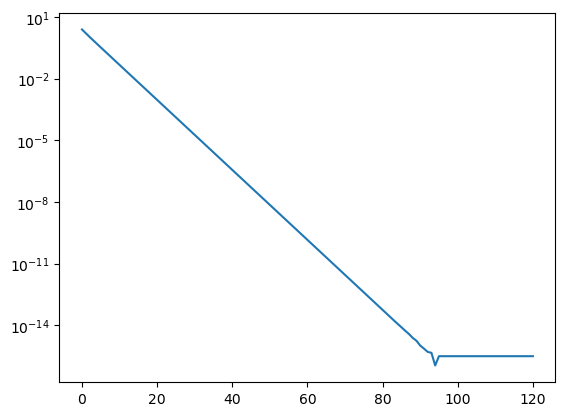

In [37]:
import numpy as np


x0 = np.zeros([3,1])


L = np.array([[0,0,0],
              [2,0,0],
              [-1,2,0]])

D =np.array([[3,0,0],
             [0,4,0],
             [0,0,5]])

U =np.array([[0,1,-1],
             [0,0,1],
             [0,0,0]])

b= np.array([[4], [1], [1]])

D_inv = np.array([[1/3,0,0],
                  [0,1/4,0],
                  [0,0,1/5]]) 
x=x0

x_exact = np.linalg.solve(L+U+D, b)

x_err=[]
x_err.append(norm(x_exact-x))

for i in range(120):
    x= D_inv@(b-(L+U)@x)
    x_err.append(norm(x_exact-x))
    #print(x)

    
#    input()

print(L)
print(D)
print(U)    
print(x)

pt.semilogy(x_err)
show()

In [ ]:
np.linalg.solve(L+U+D, b)